## 1. Introduction to GeoPandas

#### 1. Imports: 

In [33]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import os
os.chdir('..')
import pathlib
path = pathlib.Path().resolve()

Difference between Pandas DataFrame and GeoPandas GeoDataFrame is that second one have to have column `geometry` 
Below is example of GeoDataFrame

In [4]:
shp_file = f'{path}/data/countries.shp'
shp = gpd.read_file(shp_file)
shp

,NAME,POP_EST,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR,ECONOMY,INCOME_GRP,CONTINENT,REGION_UN,SUBREGION,geometry
0,Indonesia,260580739,3028000.0,2017,2010,2016,4. Emerging region: MIKT,4. Lower middle income,Asia,Asia,South-Eastern Asia,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Malaysia,31381992,863000.0,2017,2010,2016,6. Developing region,3. Upper middle income,Asia,Asia,South-Eastern Asia,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Chile,17789267,436100.0,2017,2002,2016,5. Emerging region: G20,3. Upper middle income,South America,Americas,South America,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,Bolivia,11138234,78350.0,2017,2001,2016,5. Emerging region: G20,4. Lower middle income,South America,Americas,South America,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
4,Peru,31036656,410400.0,2017,2007,2016,5. Emerging region: G20,3. Upper middle income,South America,Americas,South America,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."
...,...,...,...,...,...,...,...,...,...,...,...,...
250,Macao,601969,63220.0,2017,2011,2016,6. Developing region,2. High income: nonOECD,Asia,Asia,Eastern Asia,"MULTIPOLYGON (((113.55860 22.16303, 113.56943 ..."
251,Ashmore and Cartier Is.,0,0.0,2017,-99,2016,7. Least developed region,5. Low income,Oceania,Oceania,Australia and New Zealand,"POLYGON ((123.59702 -12.42832, 123.59775 -12.4..."
252,Bajo Nuevo Bank,0,0.0,2017,-99,2016,7. Least developed region,5. Low income,North America,Americas,Caribbean,"POLYGON ((-79.98929 15.79495, -79.98782 15.796..."
253,Serranilla Bank,0,0.0,0,-99,0,7. Least developed region,5. Low income,North America,Americas,Caribbean,"POLYGON ((-78.63707 15.86209, -78.64041 15.864..."


Data types:

In [6]:
type(shp[['NAME', 'POP_EST']])

pandas.core.frame.DataFrame

In [7]:
type(shp[['NAME', 'geometry']])

geopandas.geodataframe.GeoDataFrame

<AxesSubplot: >

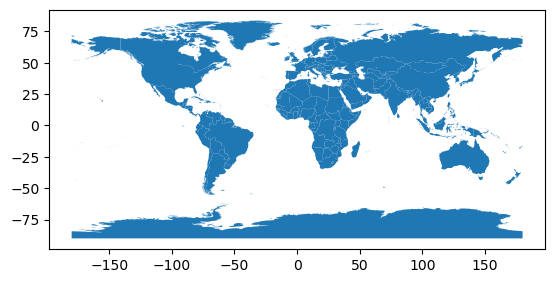

In [8]:
shp.plot()

#### 2. Converting csv into geopandas 

In [9]:
csv_file = f'{path}/data/acled2019.csv'
df = pd.read_csv(csv_file)
df.head()

,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3
0,6768128,887,YEM45982,45982,31 December 2019,2019,1,Battles,Armed clash,Military Forces of Yemen (2012-),...,Habban,14.3541,47.0765,2,Yemen Data Project; Aden al Ghad; Al Janoob al...,Local partner-National,"On 31 December 2019, clashes reportedly erupte...",0,1580761030,YEM
1,6768129,887,YEM45983,45983,31 December 2019,2019,1,Strategic developments,Change to group/activity,Military Forces of Yemen (2012-) Security Belt...,...,Habban,14.3541,47.0765,2,Al Janoob al Youm; Yemen Data Project,Local partner-National,"On 31 December 2019, forces loyal to the South...",0,1580761030,YEM
2,6768130,887,YEM45984,45984,31 December 2019,2019,1,Battles,Armed clash,Military Forces of Yemen (2012-),...,Wadi Haburah,14.2081,47.1570,1,Al Janoob al Youm; Aden al Ghad; Yemen Data Pr...,Local partner-National,"On 31 December 2019, clashes reportedly erupte...",1,1580761030,YEM
3,6715395,356,IND68948,68948,31 December 2019,2019,1,Protests,Peaceful protest,Protesters (India),...,Bhubaneswar,20.2724,85.8338,1,Pioneer (India),National,"On 31 December, students' wing of INC and Mili...",0,1578514389,IND
4,6943236,222,SLV861,861,31 December 2019,2019,1,Violence against civilians,Attack,B-18: Barrio-18,...,Huizucar,13.5894,-89.2383,1,El Salvador.com,National,On 31th December 2019 in Huizucar (La Libertad...,1,1582839958,SLV


<AxesSubplot: >

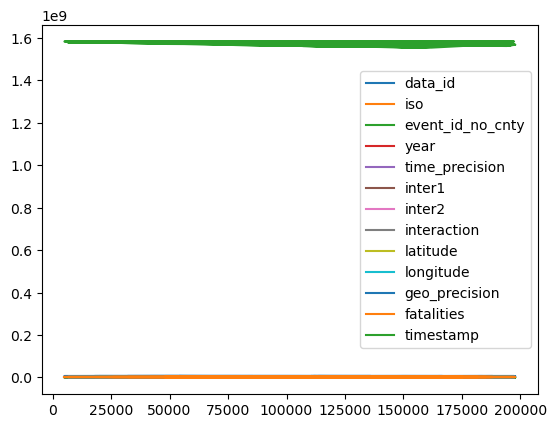

In [10]:
df.sample(100).plot()

We cannot see map above as it is not geopandas file. To convert we may use below function: 

In [11]:
gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df.longitude, df.latitude))
gdf.head()

,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,...,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3,geometry
0,6768128,887,YEM45982,45982,31 December 2019,2019,1,Battles,Armed clash,Military Forces of Yemen (2012-),...,14.3541,47.0765,2,Yemen Data Project; Aden al Ghad; Al Janoob al...,Local partner-National,"On 31 December 2019, clashes reportedly erupte...",0,1580761030,YEM,POINT (47.07650 14.35410)
1,6768129,887,YEM45983,45983,31 December 2019,2019,1,Strategic developments,Change to group/activity,Military Forces of Yemen (2012-) Security Belt...,...,14.3541,47.0765,2,Al Janoob al Youm; Yemen Data Project,Local partner-National,"On 31 December 2019, forces loyal to the South...",0,1580761030,YEM,POINT (47.07650 14.35410)
2,6768130,887,YEM45984,45984,31 December 2019,2019,1,Battles,Armed clash,Military Forces of Yemen (2012-),...,14.2081,47.1570,1,Al Janoob al Youm; Aden al Ghad; Yemen Data Pr...,Local partner-National,"On 31 December 2019, clashes reportedly erupte...",1,1580761030,YEM,POINT (47.15700 14.20810)
3,6715395,356,IND68948,68948,31 December 2019,2019,1,Protests,Peaceful protest,Protesters (India),...,20.2724,85.8338,1,Pioneer (India),National,"On 31 December, students' wing of INC and Mili...",0,1578514389,IND,POINT (85.83380 20.27240)
4,6943236,222,SLV861,861,31 December 2019,2019,1,Violence against civilians,Attack,B-18: Barrio-18,...,13.5894,-89.2383,1,El Salvador.com,National,On 31th December 2019 in Huizucar (La Libertad...,1,1582839958,SLV,POINT (-89.23830 13.58940)


<AxesSubplot: >

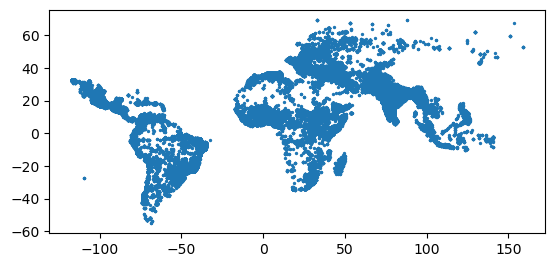

In [12]:
gdf.plot(markersize=2)

#### 3. Saving gpd file & CRS system

crs is coordinate reference system 
For example, one of the most commonly used CRS is the WGS84 latitude-longitude projection. This can be referred to using the authority code "EPSG:4326".
More: https://geopandas.org/en/stable/docs/user_guide/projections.html 

In [13]:
path_outputs = f'{path}/outputs' 
gdf.to_file(f'{path_outputs}/acled2019.shp', crs={'init':"epsg:4326"})

/var/folders/2f/c6skwjt96m984f45rzp9_qw40000gn/T/ipykernel_60576/231140029.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file(f'{path_outputs}/acled2019.shp', crs={'init':"epsg:4326"})
/Applications/anaconda3/envs/spatial/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


To check format we can use `.csr` method 

In [15]:
shp.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

More examples below

#### 4. Saving as geojson

In [14]:
gdf.sample(5000).to_file(f'{path_outputs}/aucled2019.geojson', driver='GeoJSON')

#### 5. Working on subsets of data: 

<AxesSubplot: >

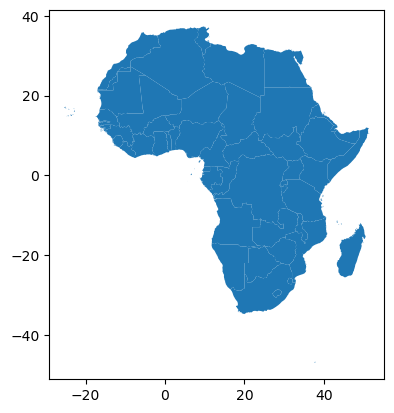

In [16]:
shp[shp.CONTINENT == 'Africa'].plot()

Reading `.shp` file with mask created above: 

<AxesSubplot: >

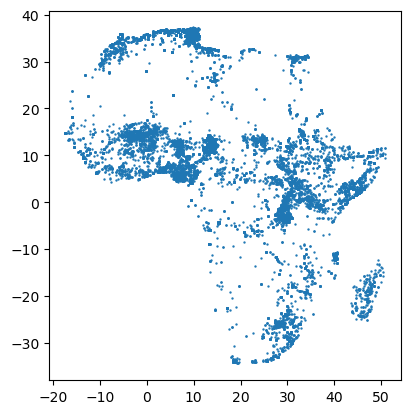

In [18]:
africa = gpd.read_file(f'{path_outputs}/acled2019.shp', mask = shp[shp.CONTINENT == 'Africa'])
africa.plot(markersize=0.5)

Subsets of rows: 

<AxesSubplot: >

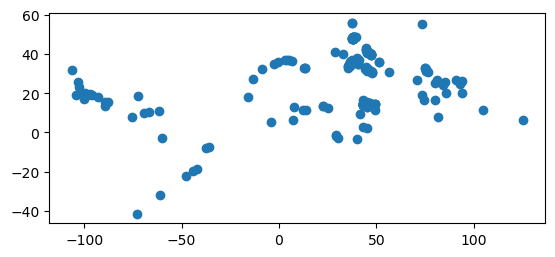

In [19]:
subset = gpd.read_file(f'{path_outputs}/acled2019.shp', rows = 200)
subset.plot()

<AxesSubplot: >

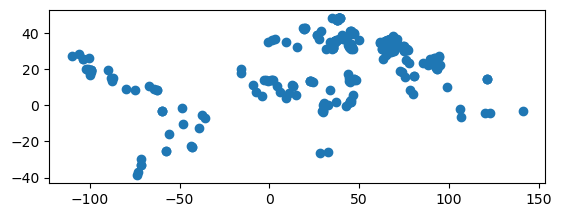

In [20]:
subset = subset = gpd.read_file(f'{path_outputs}/acled2019.shp', rows = slice(200,500)) 
subset.plot()

#### 6.Projections

- Different CRS have different measurements: meters, decimal degrees. It is possible and often required to reproject data between different formats. 
- Source for projections: https://spatialreference.org/ 

6.1 Check `geometry` column 

In [26]:
shp.geometry[:5]

0    MULTIPOLYGON (((117.70361 4.16341, 117.70361 4...
1    MULTIPOLYGON (((117.70361 4.16341, 117.69711 4...
2    MULTIPOLYGON (((-69.51009 -17.50659, -69.50611...
3    POLYGON ((-69.51009 -17.50659, -69.51009 -17.5...
4    MULTIPOLYGON (((-69.51009 -17.50659, -69.63832...
Name: geometry, dtype: geometry

Geometry is currently in decimal points. To project into different measurment we can use `to_crs` method. 

In [27]:
projected = shp.to_crs(epsg=3395) 

In [28]:
projected.geometry[:5]

0    MULTIPOLYGON (((13102705.696 460777.652, 13102...
1    MULTIPOLYGON (((13102705.696 460777.652, 13101...
2    MULTIPOLYGON (((-7737827.685 -1967028.785, -77...
3    POLYGON ((-7737827.685 -1967028.785, -7737828....
4    MULTIPOLYGON (((-7737827.685 -1967028.785, -77...
Name: geometry, dtype: geometry

It can help with better data visualisation: 

<AxesSubplot: >

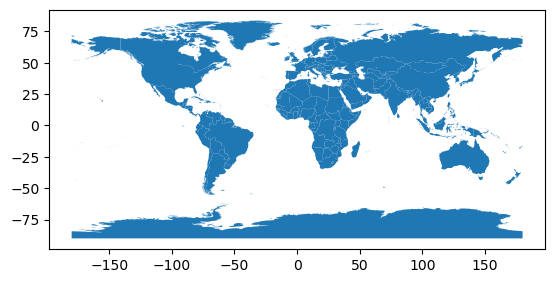

In [29]:
shp.plot()

<AxesSubplot: >

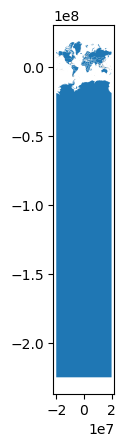

In [30]:
projected.plot()

In [31]:
projected = shp[(shp.NAME != 'Antarctica') & (shp.NAME != 'Fr. S. Antarctic Lands')].to_crs(epsg=3395) 

<AxesSubplot: >

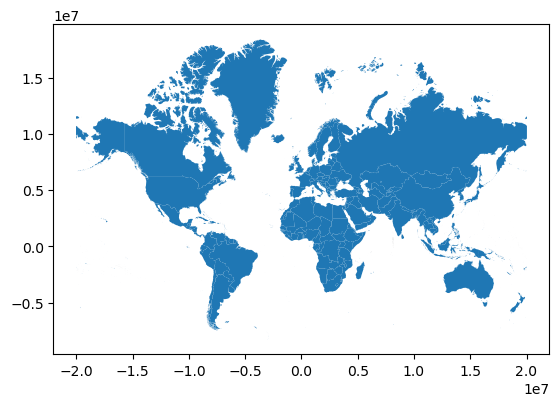

In [32]:
projected.plot()

While overlaying data is important to keep this in mind as otherwise data will not align properly. 

<AxesSubplot: >

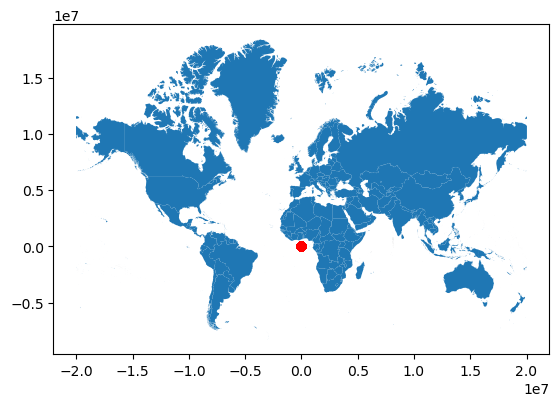

In [34]:
fig, ax = plt.subplots()
projected.plot(ax=ax)
gdf.plot(ax=ax, color='red') 

<AxesSubplot: >

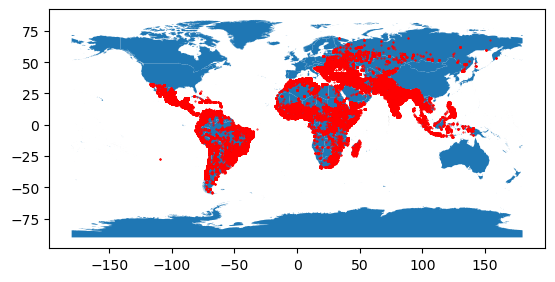

In [37]:
fig, ax = plt.subplots()
shp.plot(ax=ax)
gdf.plot(ax=ax, color='red', markersize = 0.2)